<a href="https://colab.research.google.com/github/benvictoria21/pandas/blob/master/covid_19_japan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import statsmodels.api as sm
import requests
import io
from matplotlib import pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
import pandas as pd

In [22]:
covid_jpn_total = pd.read_csv('/content/covid_jpn_metadata.csv')
covid_jpn_metadata = pd.read_csv('/content/covid_jpn_prefecture.csv')
covid_jpn_prefecture = pd.read_csv('/content/covid_jpn_prefecture.csv')

In [23]:
print(covid_jpn_total.shape)
covid_jpn_total.head(10)

(846, 7)


,Prefecture,Category,Item,Value,Date,Primary_source,Secondary_source
0,Hokkaido,Population,Total,5320,2017-10-01,https://www.mhlw.go.jp/toukei/youran/indexyk_1...,NaN
1,Aomori,Population,Total,1278,2017-10-01,https://www.mhlw.go.jp/toukei/youran/indexyk_1...,NaN
2,Iwate,Population,Total,1255,2017-10-01,https://www.mhlw.go.jp/toukei/youran/indexyk_1...,NaN
3,Miyagi,Population,Total,2323,2017-10-01,https://www.mhlw.go.jp/toukei/youran/indexyk_1...,NaN
4,Akita,Population,Total,996,2017-10-01,https://www.mhlw.go.jp/toukei/youran/indexyk_1...,NaN
5,Yamagata,Population,Total,1102,2017-10-01,https://www.mhlw.go.jp/toukei/youran/indexyk_1...,NaN
6,Fukushima,Population,Total,1882,2017-10-01,https://www.mhlw.go.jp/toukei/youran/indexyk_1...,NaN
7,Ibaraki,Population,Total,2892,2017-10-01,https://www.mhlw.go.jp/toukei/youran/indexyk_1...,NaN
8,Tochigi,Population,Total,1957,2017-10-01,https://www.mhlw.go.jp/toukei/youran/indexyk_1...,NaN
9,Gunma,Population,Total,1960,2017-10-01,https://www.mhlw.go.jp/toukei/youran/indexyk_1...,NaN


In [24]:
print(covid_jpn_metadata.shape)
covid_jpn_metadata.head(10)

(13066, 8)


,Date,Prefecture,Positive,Tested,Discharged,Fatal,Hosp_require,Hosp_severe
0,2020-03-18,Hokkaido,154,1587.0,69.0,7.0,NaN,NaN
1,2020-03-18,Aomori,0,75.0,0.0,0.0,NaN,NaN
2,2020-03-18,Iwate,0,24.0,0.0,0.0,NaN,NaN
3,2020-03-18,Miyagi,1,138.0,1.0,0.0,NaN,NaN
4,2020-03-18,Akita,2,109.0,1.0,0.0,NaN,NaN
5,2020-03-18,Yamagata,0,123.0,0.0,0.0,NaN,NaN
6,2020-03-18,Fukushima,2,127.0,0.0,0.0,NaN,NaN
7,2020-03-18,Ibaraki,2,454.0,0.0,0.0,NaN,NaN
8,2020-03-18,Tochigi,3,242.0,2.0,0.0,NaN,NaN
9,2020-03-18,Gunma,10,161.0,0.0,0.0,NaN,NaN


In [25]:
print(covid_jpn_prefecture.shape)
covid_jpn_prefecture.head(10)

(13066, 8)


,Date,Prefecture,Positive,Tested,Discharged,Fatal,Hosp_require,Hosp_severe
0,2020-03-18,Hokkaido,154,1587.0,69.0,7.0,NaN,NaN
1,2020-03-18,Aomori,0,75.0,0.0,0.0,NaN,NaN
2,2020-03-18,Iwate,0,24.0,0.0,0.0,NaN,NaN
3,2020-03-18,Miyagi,1,138.0,1.0,0.0,NaN,NaN
4,2020-03-18,Akita,2,109.0,1.0,0.0,NaN,NaN
5,2020-03-18,Yamagata,0,123.0,0.0,0.0,NaN,NaN
6,2020-03-18,Fukushima,2,127.0,0.0,0.0,NaN,NaN
7,2020-03-18,Ibaraki,2,454.0,0.0,0.0,NaN,NaN
8,2020-03-18,Tochigi,3,242.0,2.0,0.0,NaN,NaN
9,2020-03-18,Gunma,10,161.0,0.0,0.0,NaN,NaN


In [26]:
date_positive_all = covid_jpn_prefecture.groupby('Date').sum()
date_positive_all

,Positive,Tested,Discharged,Fatal,Hosp_require,Hosp_severe
Date,,,,,,
2020-03-18,890,14072.0,173.0,31.0,0.0,0.0
2020-03-19,926,18015.0,182.0,33.0,0.0,0.0
2020-03-20,975,18134.0,187.0,35.0,0.0,0.0
2020-03-21,1012,18226.0,224.0,36.0,0.0,0.0
2020-03-22,1054,18322.0,236.0,41.0,0.0,0.0
...,...,...,...,...,...,...
2020-12-16,185237,3841320.0,156546.0,2738.0,25287.0,605.0
2020-12-17,185237,3841320.0,156546.0,2738.0,25287.0,605.0
2020-12-18,191154,3960180.0,161537.0,2827.0,26064.0,598.0


In [27]:
positive_days = date_positive_all['Positive'] - date_positive_all.shift(1)['Positive']
positive_days

Date
2020-03-18       NaN
2020-03-19      36.0
2020-03-20      49.0
2020-03-21      37.0
2020-03-22      42.0
               ...  
2020-12-16    3060.0
2020-12-17       0.0
2020-12-18    5917.0
2020-12-19    2836.0
2020-12-20    2618.0
Name: Positive, Length: 278, dtype: float64

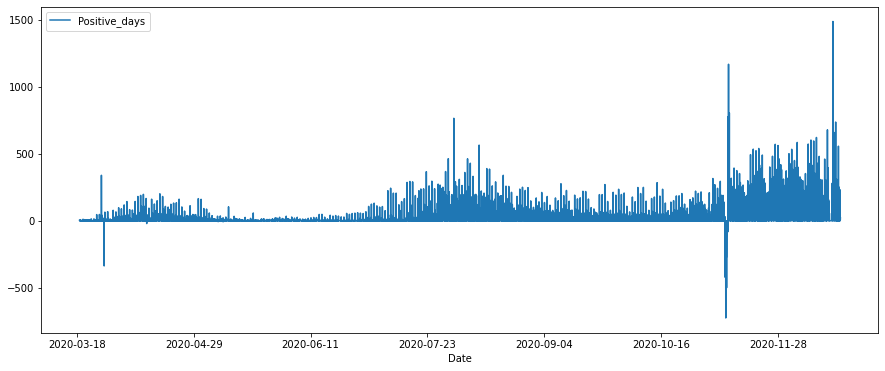

In [28]:
date_positive_prefecture = covid_jpn_prefecture['Positive'] - covid_jpn_prefecture.shift(47)['Positive']
covid_jpn_prefecture['Positive_days'] = date_positive_prefecture
covid_jpn_prefecture.plot(x='Date', y='Positive_days')